In [1]:
# import useful libraries
import numpy as np #
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.preprocessing import OneHotEncoder

# Import the supervised learning models from sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


In [2]:
#Reading the csv data set Donations

data = pd.read_csv("C:/Users/rdasa/Desktop/TA/Donors.csv")

In [3]:
# First five rows in the data set
data.head(5)

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,donor
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


In [4]:
#Changing the data header with prefixes and getting dummies and implementing one hot label encoding
data1=pd.concat([data,pd.get_dummies(data['workclass'], prefix='WorkClass'),pd.get_dummies(data['education_level'], prefix='Education_level'),pd.get_dummies(data['marital-status'], prefix='Marital-status'),pd.get_dummies(data['occupation'], prefix='Occupation'),pd.get_dummies(data['relationship'], prefix='Relationship'),pd.get_dummies(data['race'], prefix='Race'),pd.get_dummies(data['sex'], prefix='Sex'),pd.get_dummies(data['native-country'], prefix='Native-Country')],axis=1)

In [5]:
# Droping the old initial columns
data3 = data1.drop(['workclass','education_level','marital-status','occupation','relationship','race','sex','native-country'],axis=1)

In [6]:
#Header of first five rows after one hot label encoding
data3.head(5)

,age,education-num,capital-gain,capital-loss,hours-per-week,donor,WorkClass_ Federal-gov,WorkClass_ Local-gov,WorkClass_ Private,WorkClass_ Self-emp-inc,...,Native-Country_ Portugal,Native-Country_ Puerto-Rico,Native-Country_ Scotland,Native-Country_ South,Native-Country_ Taiwan,Native-Country_ Thailand,Native-Country_ Trinadad&Tobago,Native-Country_ United-States,Native-Country_ Vietnam,Native-Country_ Yugoslavia
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
#Spliting the data sets into 70/30 ratio
X=data3.drop('donor',axis=1)
#Considering the donor as the target variable
y = data3.donor
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(31655, 103) (31655,)
(13567, 103) (13567,)


In [9]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()

# fit the model with the training data
model.fit(X_train,y_train)

# coefficeints of the trained model
print('Coefficient of model :', model.coef_)

# intercept of the model
print('Intercept of model',model.intercept_)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

C:\Users\rdasa\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Coefficient of model : [[ 2.35301397e-02  1.63863335e-01  3.27923270e-04  6.78143244e-04
   2.94690428e-02  8.33107071e-02 -5.18740148e-01 -3.96096422e-01
  -3.10829911e-01 -9.24787810e-01 -7.40153630e-01 -1.93880163e-02
  -7.16027683e-01 -8.64340618e-01 -3.29698977e-01 -2.49453840e-01
  -3.20225009e-01 -7.29376436e-01 -7.21317331e-01 -1.41904790e-01
  -1.41739654e-01  1.45683020e-01  6.59502268e-01 -3.09986234e-01
   4.09443275e-01 -7.78744614e-02  6.95398227e-01 -1.34766987e-01
  -7.75171910e-01  8.37001027e-02  6.45960849e-01 -4.23775546e-01
  -1.23619526e+00 -6.65173228e-01 -4.56030240e-01 -2.08126147e-01
   9.26899808e-03 -2.17117795e-01  5.15761443e-01 -1.18009291e+00
  -8.77463158e-01 -4.61976914e-01 -1.06506736e+00 -2.31125651e-01
   2.67377720e-01  3.96450229e-01  2.03398359e-02  4.54890065e-01
  -2.49803586e-01 -1.77667621e-01 -5.46608973e-01 -8.13346806e-01
  -1.41232041e+00 -7.82611910e-01  9.05870486e-01 -5.72912098e-01
  -6.47325837e-01 -7.43964638e-01 -3.92908645e-01 -4.

In [12]:
#Support Vector Machine

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()

# fit the model with the training data
model.fit(X_train,y_train)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('Target on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)


C:\Users\rdasa\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Target on train data [0 0 0 ... 0 0 1]
accuracy_score on train dataset :  0.8693097456957827
Target on test data [0 1 0 ... 0 0 1]
accuracy_score on test dataset :  0.8574482199454558


In [10]:
#Random Forest Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model = RandomForestClassifier()

# fit the model with the training data
model.fit(X_train,y_train)

# number of trees used
print('Number of Trees used : ', model.n_estimators)

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

C:\Users\rdasa\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Number of Trees used :  10

Target on train data [0 0 0 ... 0 0 1]

accuracy_score on train dataset :  0.9630390143737166

Target on test data [0 1 0 ... 0 0 1]

accuracy_score on test dataset :  0.8371784477039876


Accuracy of the GBM on test set: 0.867
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     10221
           1       0.78      0.64      0.70      3346

   micro avg       0.87      0.87      0.87     13567
   macro avg       0.84      0.79      0.81     13567
weighted avg       0.86      0.87      0.86     13567


Target on test data [0 1 0 ... 0 0 1]

accuracy_score on test dataset :  0.8673988354094494


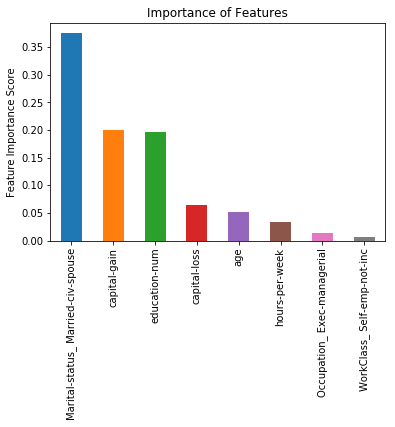

In [28]:
#Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from xgboost import plot_importance

model = GradientBoostingClassifier(n_estimators=100,max_depth=5,random_state=42)
# fit the model with the training data

model.fit(X_train,y_train)
#Feature Importance Plot
predictors=list(X_train)
feat_imp = pd.Series(model.feature_importances_, predictors).sort_values(ascending=False).nlargest(8)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')
print('Accuracy of the GBM on test set: {:.3f}'.format(model.score(X_test, y_test)))
pred=model.predict(X_test)
print(classification_report(y_test, pred))

# predict the target on the test dataset
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)